In [1]:
import os
from segmentation import *

In [4]:
path_to_dataset = "C:\COUGHVID_public_dataset\public_dataset"
files = os.listdir(path_to_dataset)
print(f"There are {len(files)} files")
extensions = set([os.path.splitext(f)[1] for f in files])
print(f"Files have extensions {extensions}")

There are 55101 files
Files have extensions {'.ogg', '.json', '.csv', '.webm'}


In [5]:
files_by_type = {}
for ext in extensions:
    files_by_type[ext] = [f for f in files if f.endswith(ext)]
    print(f"There are {len(files_by_type[ext])} files with extension {ext}")


There are 1565 files with extension .ogg
There are 27550 files with extension .json
There are 1 files with extension .csv
There are 25985 files with extension .webm


In [6]:
sample_ids = set([os.path.splitext(f)[0] for f in files])
print(f"There are {len(sample_ids)} unique filenames that are probably sample ids")


There are 27551 unique filenames that are probably sample ids


In [7]:
import json
# Let's look at a couple json files
with open(os.path.join(path_to_dataset, files_by_type['.json'][0]), 'r') as f:
    content = json.load(f)
    print(content)

with open(os.path.join(path_to_dataset, files_by_type['.json'][1]), 'r') as f:
    content = json.load(f)
    print(content)
# The two files clearly have different keys -> missingness in the dataset

{'datetime': '2020-11-25T18:58:50.488301+00:00', 'cough_detected': '0.0155', 'latitude': '48.9', 'longitude': '2.4'}
{'datetime': '2020-04-13T21:30:59.801831+00:00', 'cough_detected': '0.9609', 'latitude': '31.3', 'longitude': '34.8', 'age': '15', 'gender': 'male', 'respiratory_condition': 'False', 'fever_muscle_pain': 'False', 'status': 'healthy'}


In [8]:
import csv
import pandas
# Let's look at the one csv file called "metadata compiled"
with open(os.path.join(path_to_dataset, files_by_type['.csv'][0]), 'r') as f:
    dataframe = pandas.read_csv(f)

dataframe

#TODO: Double check that the json files are redundant because all information seems to be included in this csv
#TODO: Run basic statistics on this table and determine demographics, missingness, etc. (This might be in the paper as well)

,uuid,datetime,cough_detected,SNR,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,...,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
0,00014dcc-0f06-4c27-8c7b-737b18a2cf4c,2020-11-25T18:58:50.488301+00:00,0.0155,7.326171,48.9,2.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00039425-7f3a-42aa-ac13-834aaa2b6b92,2020-04-13T21:30:59.801831+00:00,0.9609,16.151433,31.3,34.8,15.0,male,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0007c6f1-5441-40e6-9aaf-a761d8f2da3b,2020-10-18T15:38:38.205870+00:00,0.1643,16.217201,NaN,NaN,46.0,female,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0009eb28-d8be-4dc1-92bb-907e53bc5c7a,2020-04-12T04:02:18.159383+00:00,0.9301,20.146058,40.0,-75.1,34.0,male,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0012c608-33d0-4ef7-bde3-75a0b1a0024e,2020-04-15T01:03:59.029326+00:00,0.0482,0.000000,-16.5,-71.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27545,fff30afc-db62-4408-a585-07ca9a254fcc,2020-11-05T08:26:04.219206+00:00,0.9698,11.109221,40.7,29.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27546,fff3ff61-2387-4139-938b-539db01e6be5,2020-06-28T21:28:21.530881+00:00,0.5257,43.932829,51.6,-0.2,NaN,female,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27547,fff474bf-39a4-4a61-8348-6b992fb5e439,2020-04-10T05:10:36.787070+00:00,0.1945,27.702036,-39.0,-68.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27548,fffaa9f8-4db0-46c5-90fb-93b7b014b55d,2020-04-13T18:58:26.954663+00:00,0.0243,8.825849,41.0,28.8,50.0,male,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Now let's visualize and listen to some sounds!!
import librosa
import IPython
audio_file = os.path.join(path_to_dataset, files_by_type['.webm'][0])
x, sr = librosa.load(audio_file)
print(x.shape) # audio array
print(sr) # sampling rate

c:\python39\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(214326,)
22050


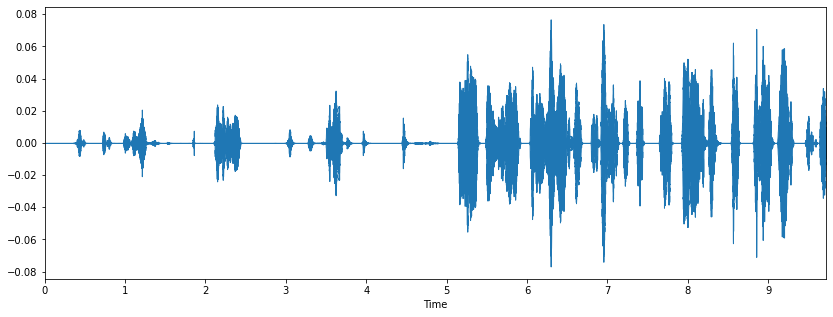

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)


In [11]:
import IPython.display as ipd
ipd.Audio(audio_file)
# THIS DOESNT SOUND LIKE COUGHING :( GONNA NEED SOME DATA CLEANING
# lets try another one

c:\python39\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


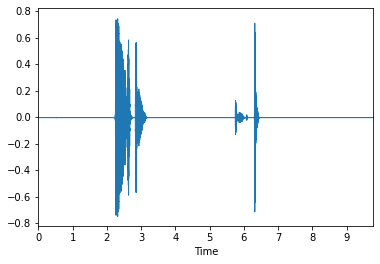

In [12]:
audio_file2 = os.path.join(path_to_dataset, files_by_type['.webm'][1])
ipd.Audio(audio_file2)
# Yay its coughing!!
x, sr = librosa.load(audio_file2)
librosa.display.waveplot(x, sr=sr)

Text(0.5, 1.0, 'Segmentation Output')

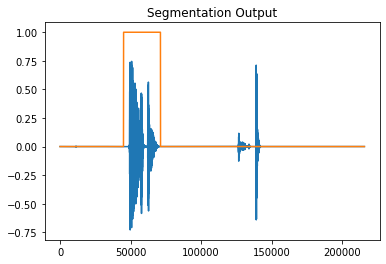

In [14]:
cough_segments, cough_mask = segment_cough(x,sr)
plt.plot(x)
plt.plot(cough_mask)
plt.title("Segmentation Output")